Estimate the housing price based sq.ft. area using simple linear regression model. Consider MBGD optimizer.
Dataset : House Sales in King Country, USA.
Write a python code to build simple linear regression model using MBGD optimizer.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

**Read Data**

In [2]:
data=pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Outliers**

In [4]:
z=np.abs(stats.zscore(data['price']))
print(z)

[0.86671733 0.00568792 0.98084935 ... 0.37586519 0.38158814 0.58588173]


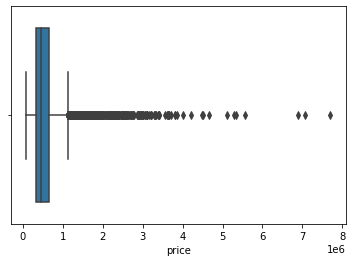

In [5]:
sns.boxplot(x=data['price'])

In [6]:
df=pd.DataFrame(data=data)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
x=df
df.drop(['date'],axis=1)
for i in df:
  if i!='date':
    q=df[i].quantile(0.99)
    df[df[i]<q]
    q_low=df[i].quantile(0.01)
    q_hi=df[i].quantile(0.99)
    df_filtered=df[(df[i]<q_hi)&(df[i]>q_low)]
df_filtered.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
print(len(df))
print(len(df_filtered))
if(len(df)==len(df_filtered)):
  print('No outliers')
data=df_filtered

21613
21178


**Normalisation**

In [9]:
data_n=data.copy()
for i in data:
  if i!='date':
    data_n[i]=data[i].copy()
    data_n[i]=(data_n[i]-data_n[i].min())/(data_n[i].max()-data_n[i].min())
data_n.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,20141013T000000,0.019266,0.090909,0.12500,0.075680,0.004338,0.0,0.0,0.0,0.5,0.500000,0.103851,0.000000,0.478261,0.000000,0.893939,0.571498,0.215000,0.153043,0.028583
1,0.647853,20141209T000000,0.060721,0.090909,0.28125,0.193878,0.005705,0.4,0.0,0.0,0.5,0.500000,0.219370,0.082988,0.443478,0.988089,0.626263,0.908959,0.163333,0.213913,0.041339
2,0.568795,20150225T000000,0.013770,0.060606,0.12500,0.040816,0.008074,0.0,0.0,0.0,0.5,0.416667,0.056009,0.000000,0.286957,0.000000,0.136364,0.936143,0.235000,0.393043,0.044052
3,0.251157,20141209T000000,0.069377,0.121212,0.37500,0.142007,0.003779,0.0,0.0,0.0,1.0,0.500000,0.088681,0.188797,0.565217,0.000000,0.681818,0.586939,0.101667,0.156522,0.024415
4,0.197333,20150218T000000,0.057049,0.090909,0.25000,0.118197,0.006425,0.0,0.0,0.0,0.5,0.583333,0.162194,0.000000,0.756522,0.000000,0.368687,0.741354,0.391667,0.233043,0.040467


**Split Data**

In [10]:
train_data,test_data=train_test_split(data_n,test_size=0.1)

In [11]:
print(len(train_data))
train_data.head()

19060


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16823,0.620143,20140522T000000,0.053377,0.151515,0.28125,0.164966,0.007731,0.0,0.0,0.0,0.50,0.583333,0.120187,0.188797,0.678261,0.0,0.383838,0.950137,0.365833,0.281739,0.054941
1860,0.965724,20150310T000000,0.062295,0.151515,0.31250,0.227041,0.007969,0.0,0.0,0.0,0.75,0.500000,0.138856,0.307054,0.521739,0.0,0.020202,0.692778,0.286667,0.250435,0.055692
19222,0.735034,20150225T000000,0.078689,0.121212,0.43750,0.192177,0.002577,0.4,0.0,0.5,0.50,0.583333,0.185531,0.139004,0.843478,0.0,0.888889,0.989223,0.104167,0.283478,0.030828
19397,0.935847,20150504T000000,0.038557,0.121212,0.31250,0.192177,0.005797,0.4,0.0,0.0,0.50,0.666667,0.263711,0.000000,0.773913,0.0,0.111111,0.241274,0.138333,0.337391,0.046912
11900,0.208183,20150122T000000,0.047213,0.181818,0.31250,0.168367,0.009766,0.0,0.0,0.0,0.50,0.500000,0.137690,0.165975,0.556522,0.0,0.050505,0.991314,0.259167,0.314783,0.060585


In [12]:
x=np.array(train_data['sqft_living'])
y=np.array(train_data['price'])

**Train Data**

In [14]:
#step 1 initialise values
bs=2
m=1.0 
c=-1.0  
l=0.1      #Learning rate
epochs=100 #Maximum iterations
ns=len(x)
nb=ns//bs
ms=ns%bs
err=[]
k=nb
if(ms>0):
  er=0
  g_m=0
  g_c=0
  for j in range(0,ms):
    er+=((y[j]-(m*x[j])-c))**2
    ind=k*bs + j
    g_m=g_m+((-1.0)*((y[ind]-m*x[ind]-c)*x[ind]))
    g_c=g_c+((-1.0)*(y[ind]-m*x[ind]-c))
  g_m=g_m/ms
  g_c=g_c/ms
  #find change in m , c
  dm=(-1.0)*l*g_m
  dc=(-1.0)*l*g_c
  #update variable 
  m=m+dm 
  c=c+dc
  er=(1/(2*len(train_data['sqft_living'])))*(er)
  err.append(er)
else:
  for i in range(epochs):
    for k in range(nb):
      er=0
      g_m=0
      g_c=0
      for j in range(bs):
        er+=((y[j]-(m*x[j])-c))**2
        ind=k*bs + j
        g_m=g_m+((-1.0)*((y[ind]-m*x[ind]-c)*x[ind]))
        g_c=g_c+((-1.0)*(y[ind]-m*x[ind]-c))
      g_m=g_m/bs
      g_c=g_c/bs
      #find change in m,c
      dm=(-1.0)*l*g_m
      dc=(-1.0)*l*g_c
      #update variable 
      m=m+dm 
      c=c+dc
      er=(1/(2*len(train_data['sqft_living'])))*(er)
      err.append(er)
#step7 print variable x1, y1
m=round(m,2)
c=round(c,2)
print("Minimum value obtained at m = {} ,c ={} for given function ".format(m,c))

Minimum value obtained at m = 0.47 ,c =-0.01 for given function 


**MSE,RMSE,MAE for Training data:**

In [15]:
yp=[]
for i in range(len(x)):
  p=m*x[i]+c
  yp.append(p)
sum=0
s1=0
for i in range(len(x)):
  sum+=(y[i]-yp[i])**2
  s1+=y[i]-yp[i]
mse=sum/len(x)
mae=s1/len(x)
print("Mean Square Error for training data (MSE) : ",mse)
print("Root mean square error for training data (RMSE) : ",mse**0.5)
print("Mean absolute error for training data (MAE) : ",mae)

Mean Square Error for training data (MSE) :  0.001211417578090891
Root mean square error for training data (RMSE) :  0.03480542454978665
Mean absolute error for training data (MAE) :  -0.00047224938707287494


Text(0.5, 1.0, 'Predicted data vs Actual Data')

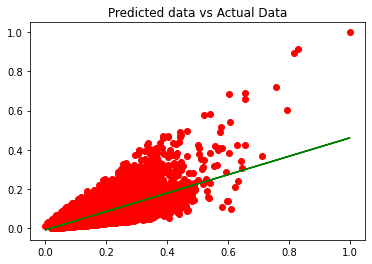

In [16]:
plt.plot(np.array(train_data['sqft_living']),np.array(yp),'green')
plt.scatter(np.array(train_data['sqft_living']),np.array(train_data['price']),color='red')
plt.title("Predicted data vs Actual Data")

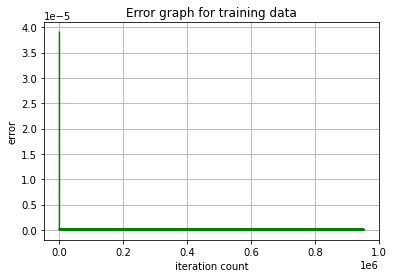

In [17]:
iters=np.arange(epochs*nb)
plt.plot(iters,err,'green')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()

**Test Data:**

In [19]:
tx=np.array(test_data['sqft_living'])
ty=np.array(test_data['price'])

yp1=[]
for i in range(len(tx)):
  p1=m*tx[i]+c
  yp1.append(p1)
sum=0
s2=0
for i in range(len(tx)):
  sum+=(ty[i]-yp1[i])**2
  s2+=ty[i]-yp1[i]
mse1=sum/len(tx)
mae=sum/len(tx)
print("Mean Square Error for testing data (MSE) : ",mse1)
print("Root mean square error for testing data (RMSE) : ",mse**0.5)
print("Mean absolute error for testing data (MAE) : ",mae)

Mean Square Error for testing data (MSE) :  0.0010082637516782454
Root mean square error for testing data (RMSE) :  0.03480542454978665
Mean absolute error for testing data (MAE) :  0.0010082637516782454


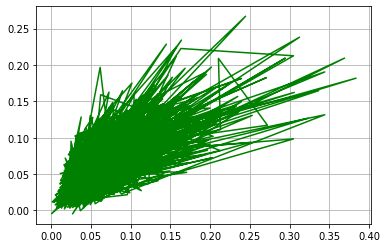

In [20]:
plt.plot(test_data['price'],yp1,'green')
plt.grid()

In [21]:
x_min=data['sqft_living'].min()
x_max=data['sqft_living'].max()
y_min=data['price'].min()
y_max=data['price'].max()

**Predict the Output:**

In [22]:
x2=float(input("Enter sqrt feet values sqft_living , sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 value : "))
x2=(x2-x_min)/(x_max-x_min)
y2=m*x2+c
y2=y2*(y_max-y_min)+y_min
print("Price  is : {}".format(y2))

Enter sqrt feet values sqft_living , sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 value : 1960
Price  is : 507666.87925170053
